# Churn Prediction:-
### A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
### Your task as a data scientist would be to predict the propensity to churn for each customer.


In [1]:
# Churn in a business term would be whether a person leaves or not,with the person leaving giving an output of 1 and otherwise 0.

In [2]:
# Import the libraries to use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold

In [3]:
# Load the data
data=pd.read_csv('churn_prediction.csv')

In [4]:
#Checking the Shape
data.shape

(28382, 21)

In [5]:
# Check total values missing
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
# Checking values including categorical and continuous
data.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


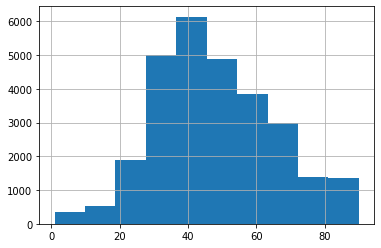

In [7]:
data['age'].hist(bins=10)
# A normal distribution seen

In [8]:
data['gender'].value_counts()/len(data)*100
# A 60% to 40% difference

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

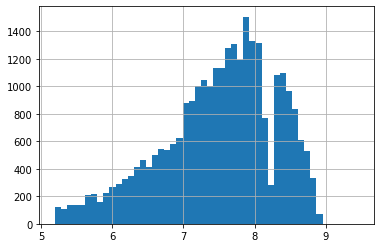

In [9]:
a=np.log(data['vintage'])
a.hist(bins=50)
# Since the value was right skewed. log transformation gives us a way to see it in normal distributed way

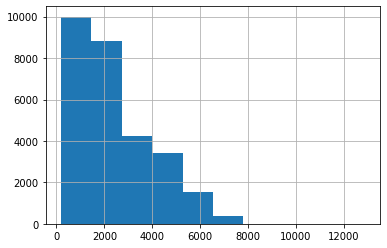

In [10]:
data['vintage'].hist()
# Representation of the original values

In [11]:
temp=data['dependents'].value_counts()
temp

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [12]:
# We can drop  values above 5  as it won't make a big difference to the result in the end 
#refer to combining sparse classes later

In [13]:
data['occupation'].value_counts()
# Most people are self_employed

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

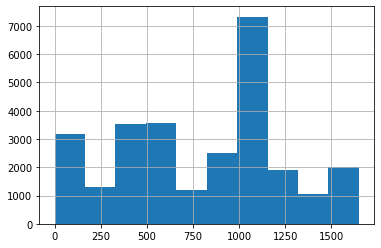

In [14]:
data['city'].hist(bins=10)
# i will have to take mean here.

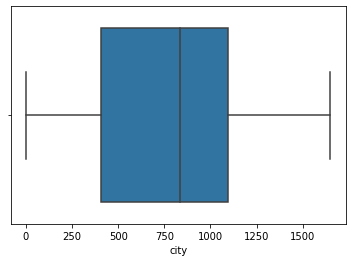

In [15]:
sns.boxplot(data['city'])

# Customer Bank Relationship
`

In [16]:
data['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

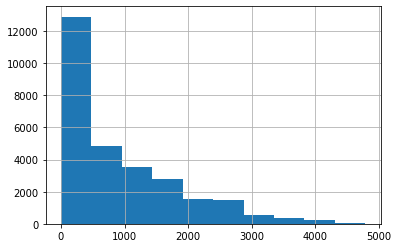

In [17]:
data['branch_code'].hist()

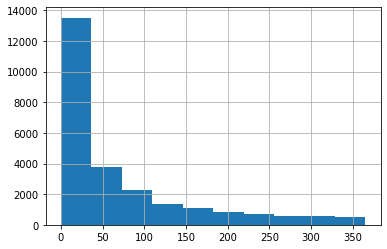

In [18]:
data['days_since_last_transaction'].hist(bins=10)

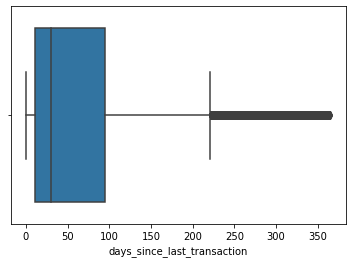

In [19]:
sns.boxplot(data['days_since_last_transaction'])
# Days after 215 and later are considered to be outliers

# Transactional Information

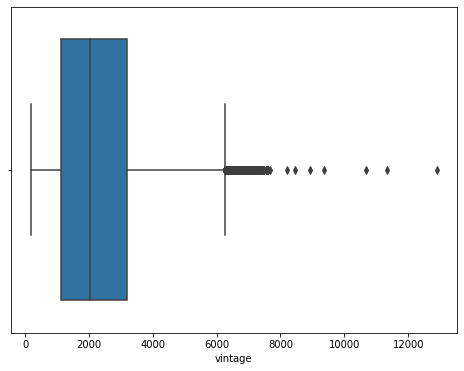

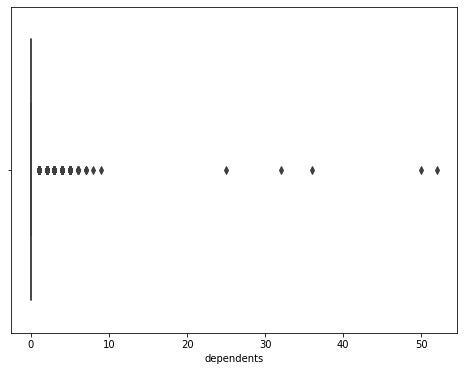

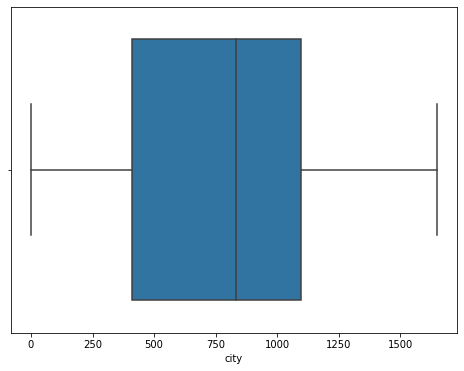

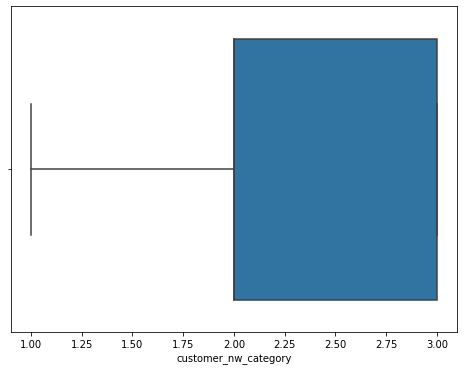

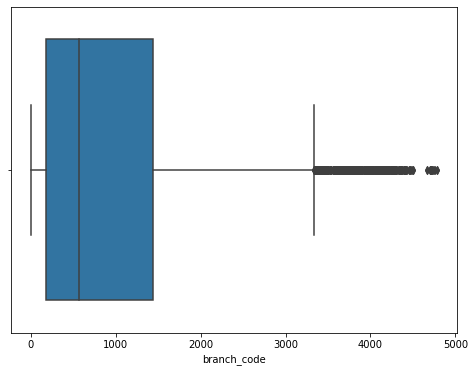

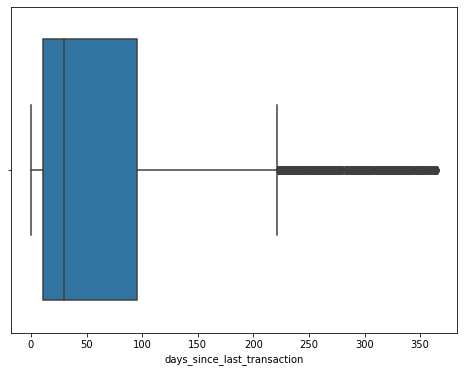

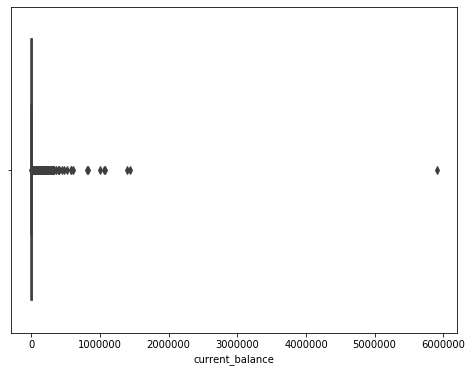

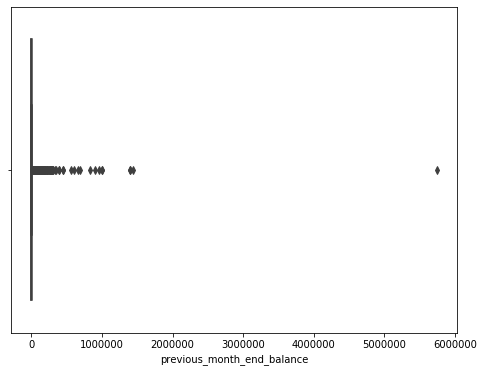

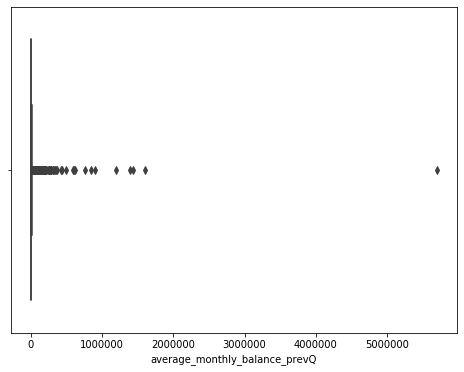

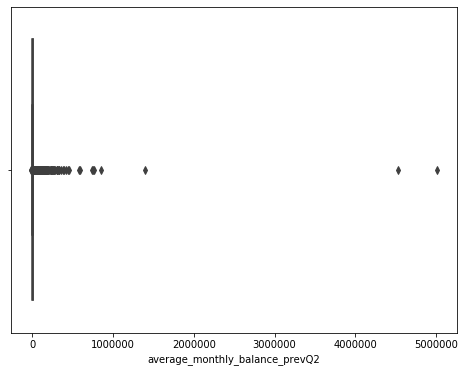

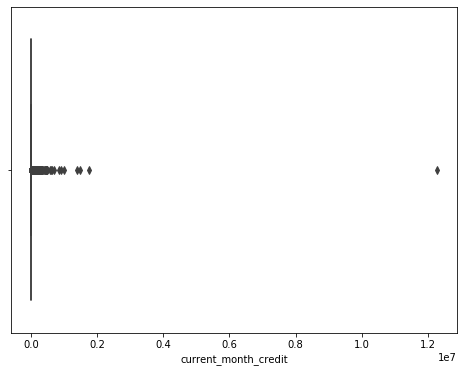

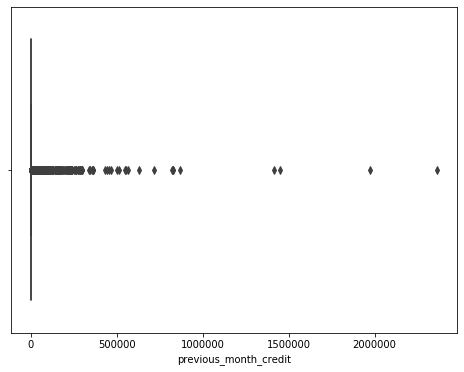

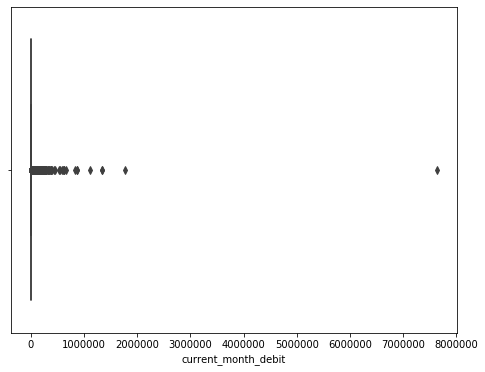

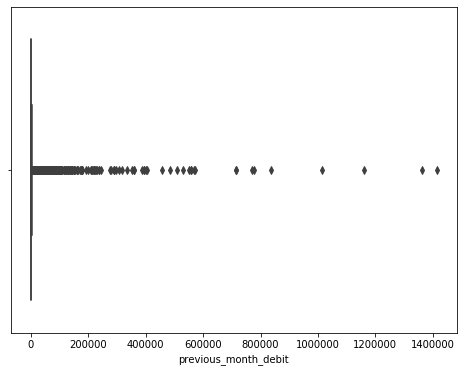

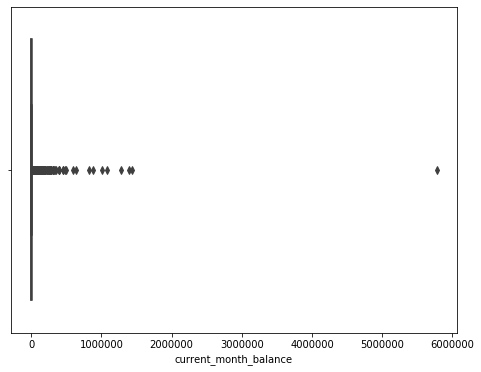

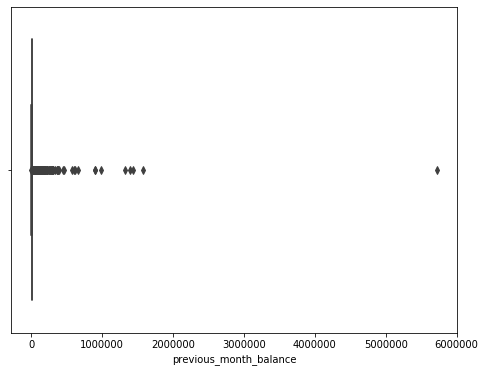

In [20]:
# To Check Outliers
# Using this way,we save time.
columns = list(data.columns)
columns.remove('churn')
columns.remove('customer_id')
columns.remove('age')


# Dropping categorical variables.

columns.remove('gender')
columns.remove('occupation')

for i in columns:
    fig = plt.figure(figsize = (8,6))
    sns.boxplot(x=data[i])

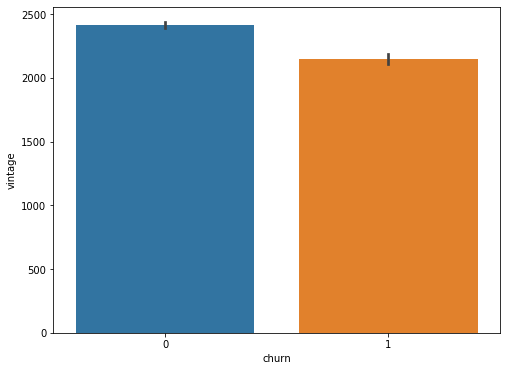

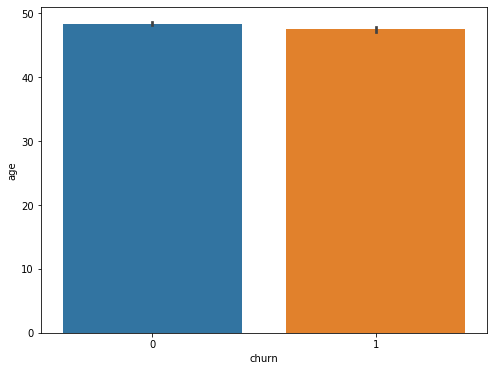

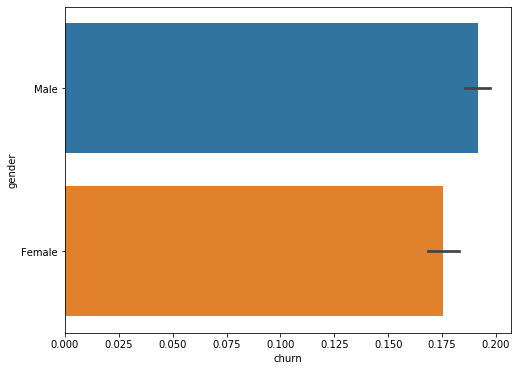

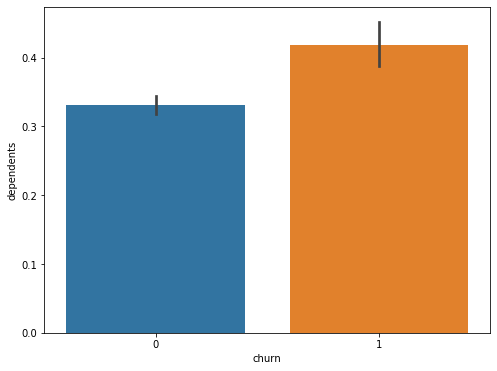

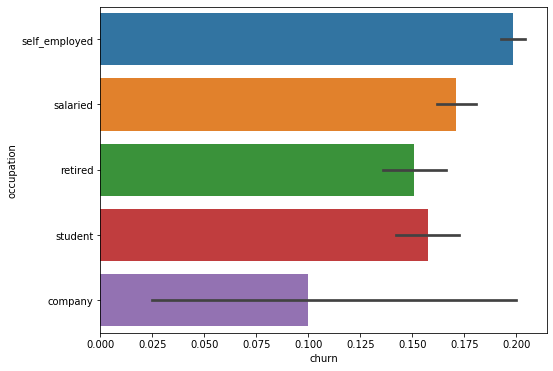

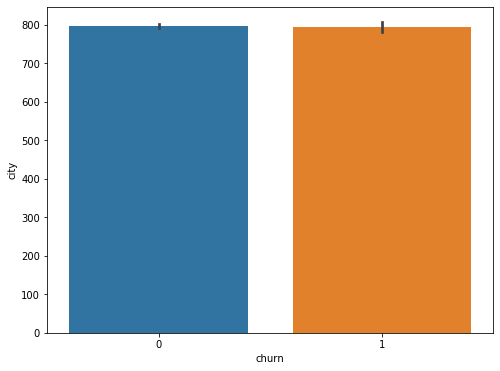

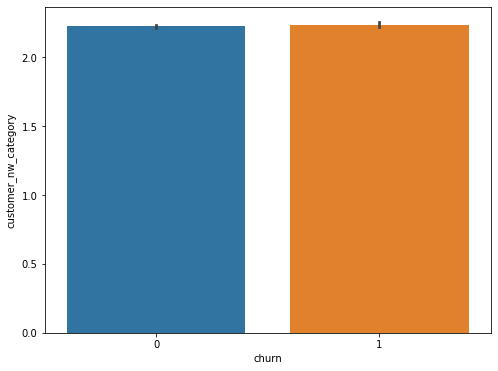

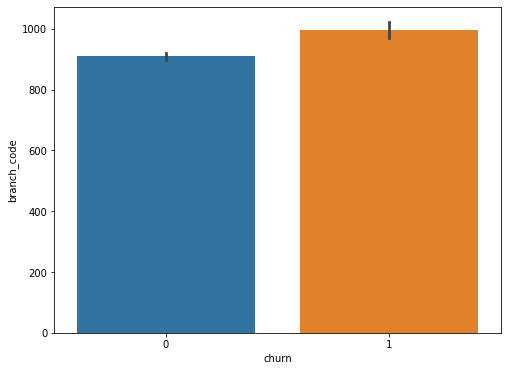

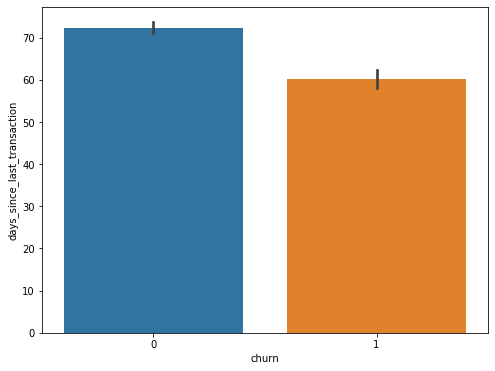

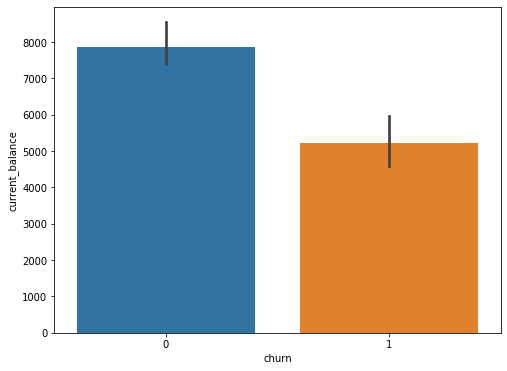

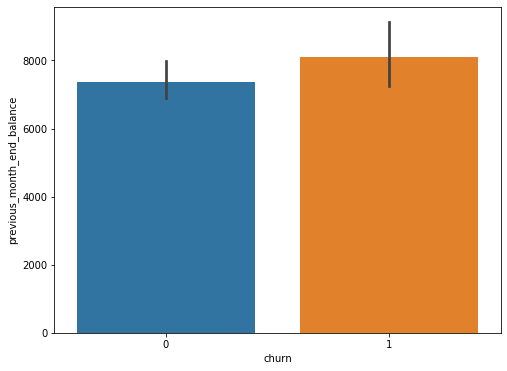

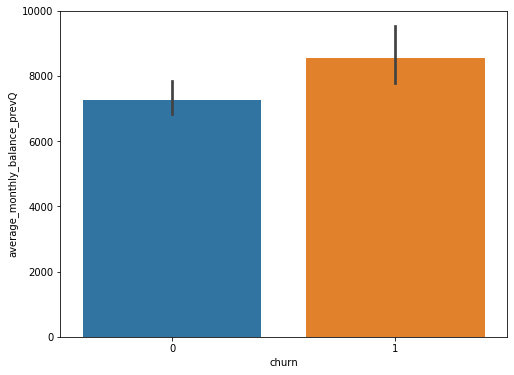

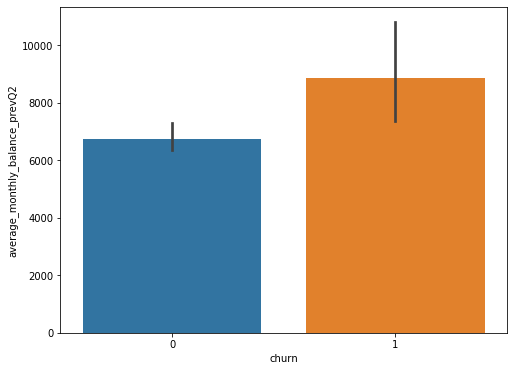

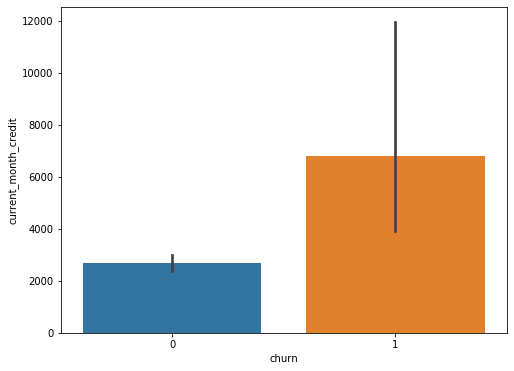

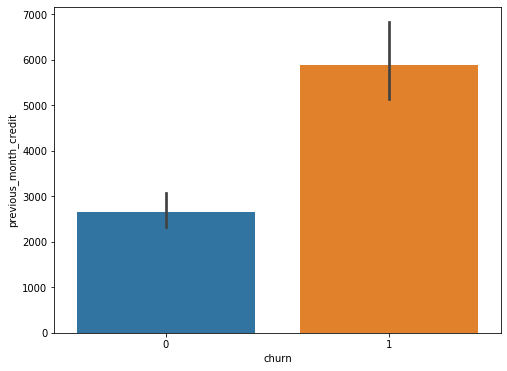

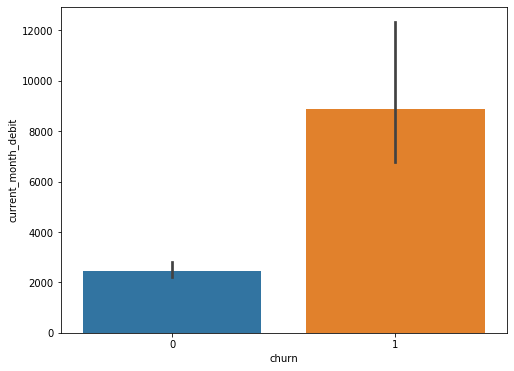

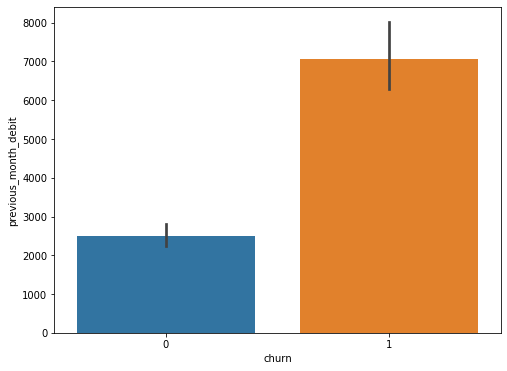

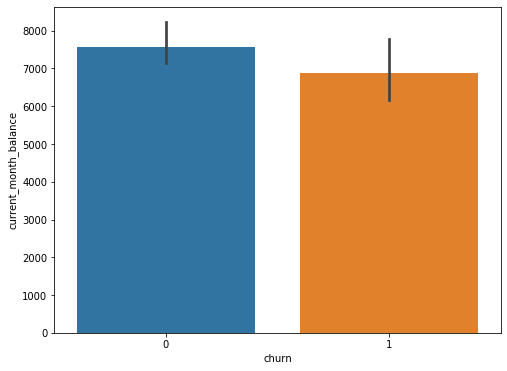

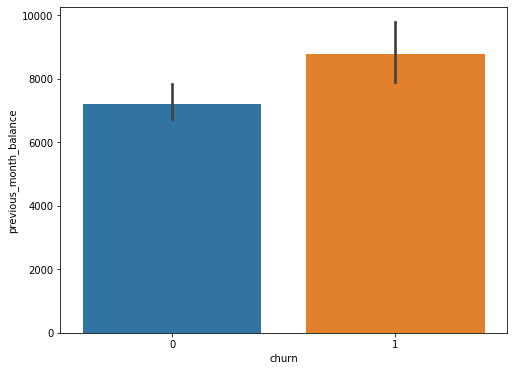

In [21]:

# Now we will se the variations of each factor against the churn,

columns=list(data.columns)
columns.remove('customer_id')
columns.remove('churn')


for i in columns:
  fig = plt.figure(figsize = (8,6))
  sns.barplot(x = 'churn', y = i, data = data)

In [22]:
# We can see the factors important for making the model are:-
# age,dependents,occupation,vintage,days_since_last_transaction,current_balance,previous_month_end_balance,
# average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,
# current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,branch code

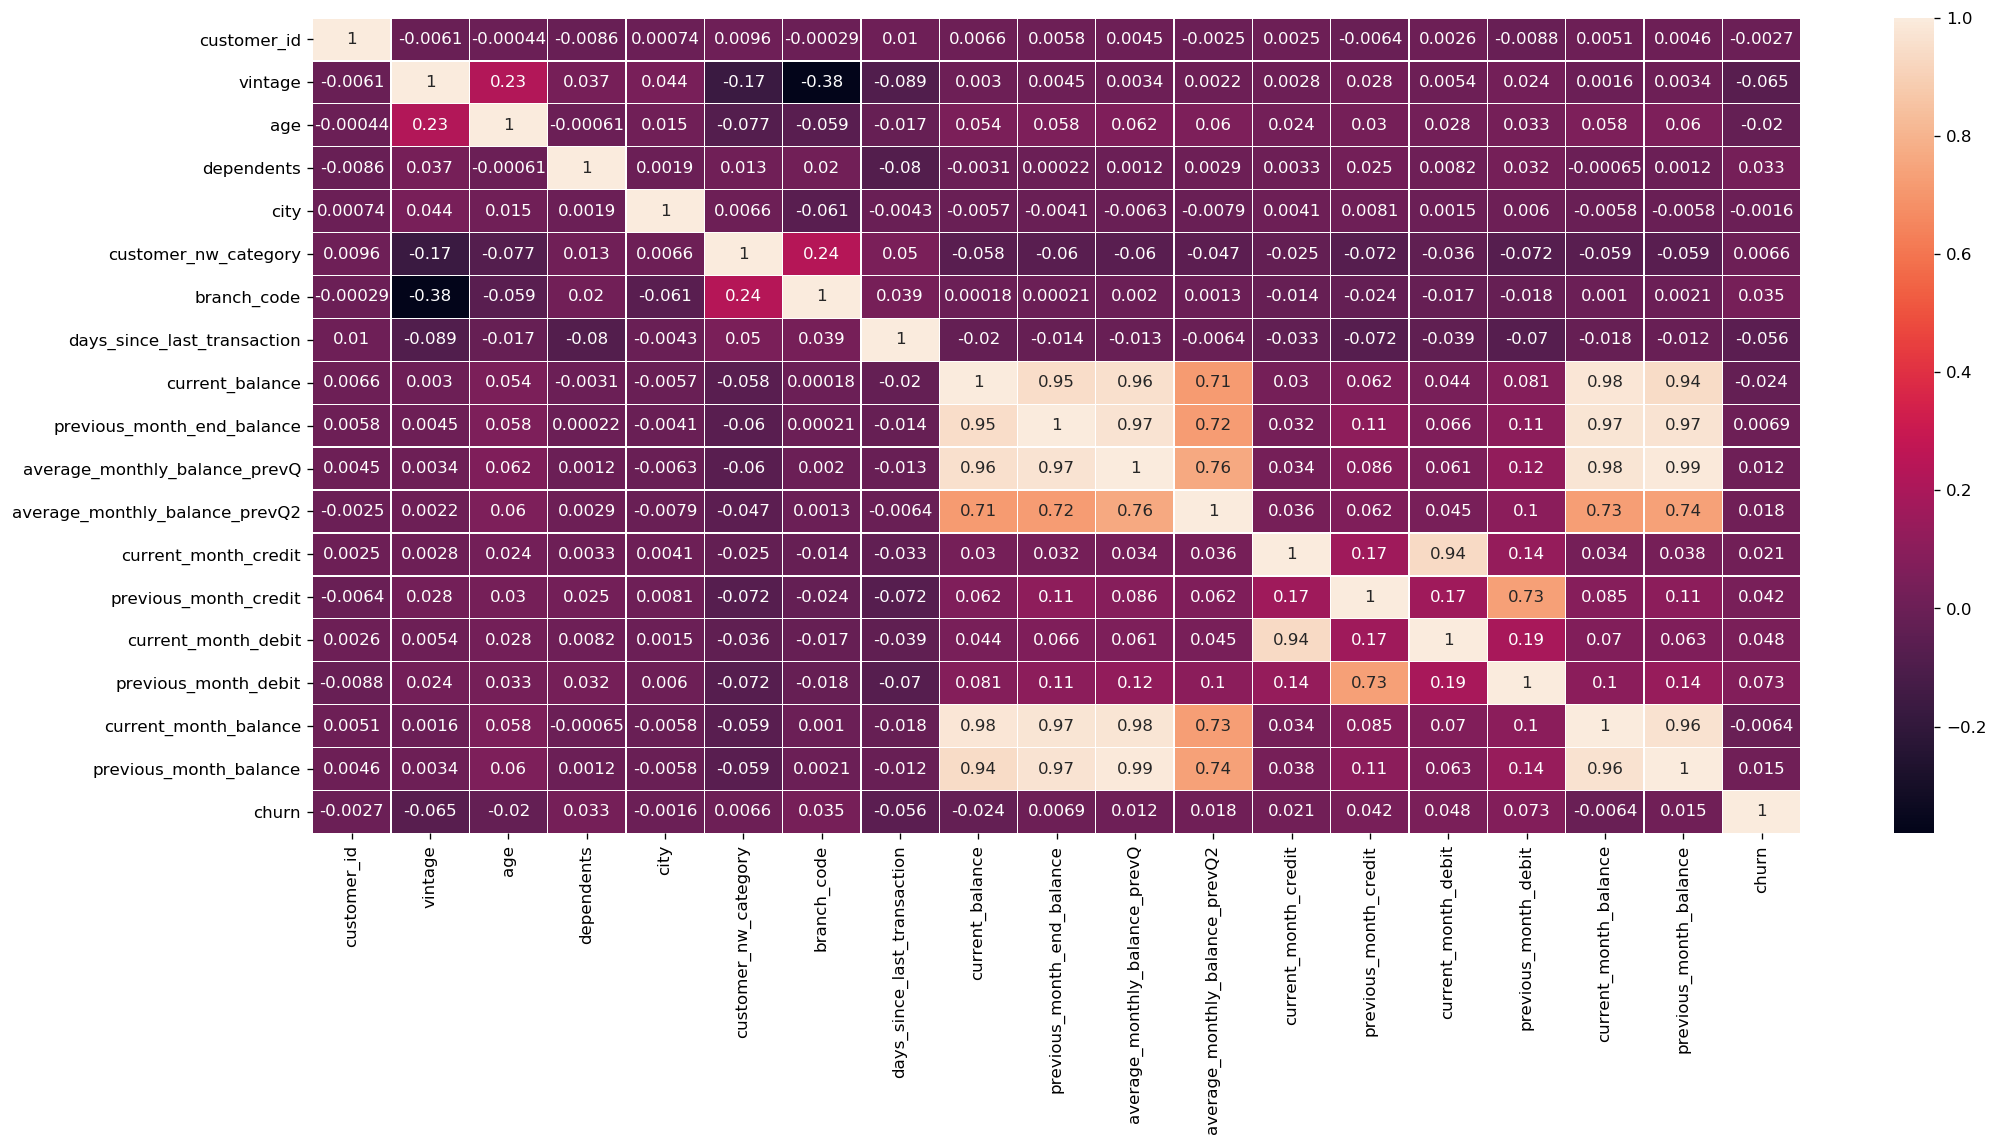

In [23]:
# To Check Correlation between values
plt.figure(figsize=(20,9),dpi=120)
corrmat=data.corr()
sns.heatmap(corrmat,annot=True,linewidths=.2)

In [24]:
# Highly Correlated values:-
# current_balance and previous_month_end_balance
# current_balance and average_monthly_balance_prevQ
# current_balance and average_monthly_balance_prevQ2
# current_balance and current_month_balance
# previous_month_end_balance and current_balance
# previous_month_end_balance and average_monthly_balance_prevQ

# Similarly most of the balance,credit and debt values are highly correlated

In [25]:
data['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [26]:
data_no_corr=data.drop(['current_month_balance','previous_month_balance','average_monthly_balance_prevQ'],axis=1)

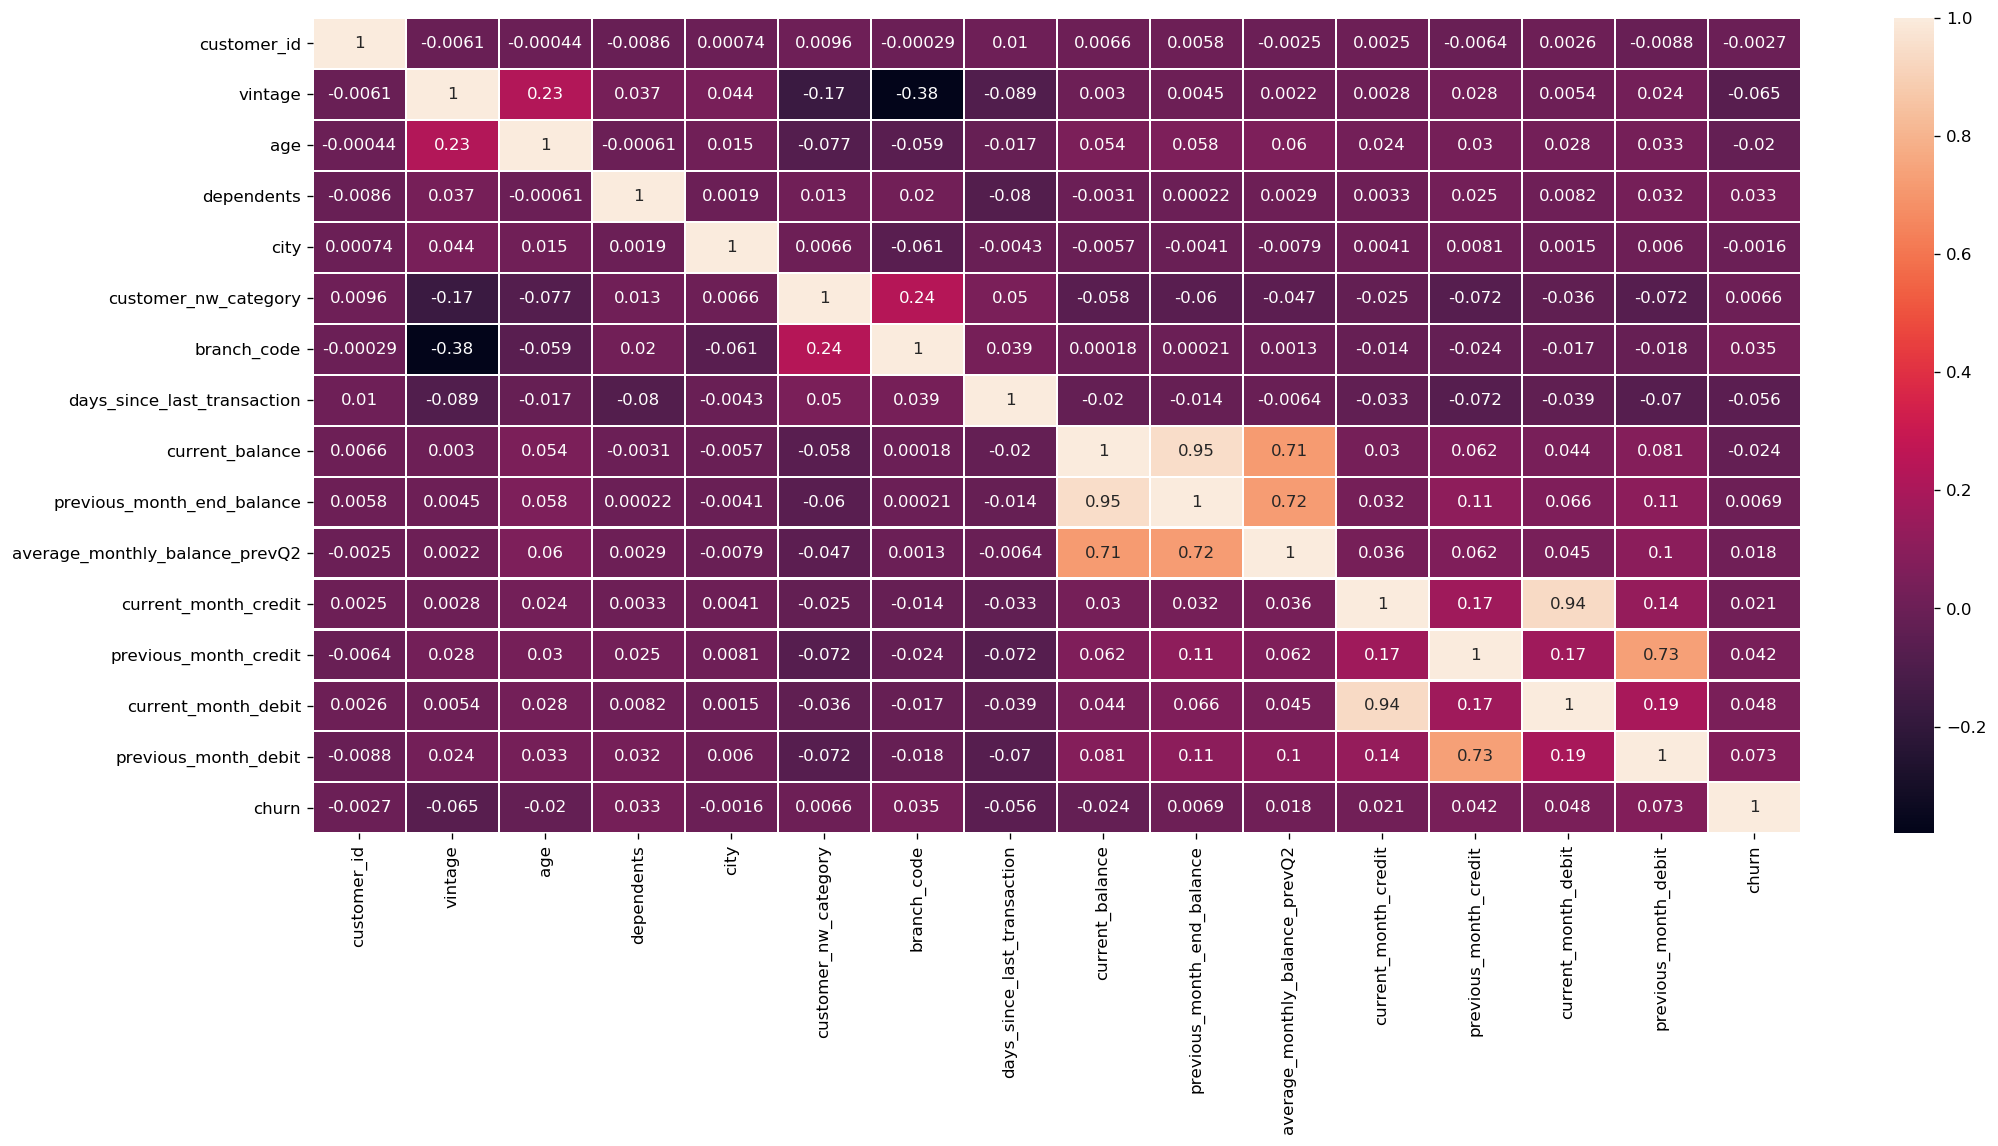

In [27]:
p=data_no_corr.corr()
plt.figure(figsize=(20,9),dpi=120)
sns.heatmap(p,annot=True,linewidth=.7)

In [28]:
data_no_corr.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,12419.41,0.56,0.56,5486.27,100.56,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,2815.94,0.61,0.61,6046.73,259.23,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,1006.54,0.47,0.47,0.47,2143.33,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1871.12,0.33,714.61,588.62,1538.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2787.70,0.30,0.30,0.30,0.30,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3865.55,1.71,2.29,901.00,1014.07,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,21925.81,4666.84,3883.06,168.23,71.80,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1857.42,0.20,0.20,0.20,0.20,0


In [29]:
data_no_corr

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,12419.41,0.56,0.56,5486.27,100.56,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,2815.94,0.61,0.61,6046.73,259.23,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,1006.54,0.47,0.47,0.47,2143.33,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1871.12,0.33,714.61,588.62,1538.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2787.70,0.30,0.30,0.30,0.30,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3865.55,1.71,2.29,901.00,1014.07,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,21925.81,4666.84,3883.06,168.23,71.80,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1857.42,0.20,0.20,0.20,0.20,0


In [30]:
data_no_corr.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
churn                               int64
dtype: object

In [31]:
# I Have removed factors which were highly correlated

In [32]:
data_no_corr.isnull().sum()
# remove gender,city,branch code

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
churn                                0
dtype: int64

# Preprocessing 
#### We are going to fill most of the data, and remove outliers as highly as possible

In [33]:
# Starting with city, since it is categorical, we will fill it with respect to mode
data_no_corr['city'].fillna(data_no_corr['city'].mode()[0],inplace=True)

In [34]:
# similar to city
data_no_corr['gender'].fillna(data_no_corr['gender'].mode()[0],inplace=True)

In [35]:
# Removing outliers
data_no_corr=data_no_corr[data_no_corr['vintage']<6100]

In [36]:
data_no_corr=data_no_corr[data_no_corr['branch_code']<3350]

In [37]:
data_no_corr['dependents'].fillna(data_no_corr['dependents'].mode()[0],inplace=True)
data_no_corr['dependents'].value_counts()
# We see that the value above 5 are only 18 compared to the rest of the data filled from 0-5

0.0     22701
2.0      2011
1.0      1280
3.0       651
4.0       175
5.0        39
6.0         7
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [38]:
data_no_corr['occupation'].fillna(data_no_corr['occupation'].mode()[0],inplace=True)

In [39]:
data_no_corr=data_no_corr.loc[data_no_corr['dependents']<6]
# Removing the outlier

In [40]:
# As we checked before,we are removing most of the outliers
data_no_corr=data_no_corr.loc[data_no_corr['days_since_last_transaction']<225]

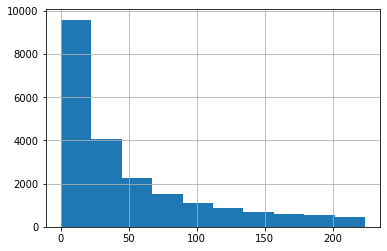

In [41]:
data_no_corr['days_since_last_transaction'].hist()

In [42]:
data_no_corr.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
churn                             0
dtype: int64

In [43]:
data_no_corr['gender'].replace({'Male':0,'Female':1},inplace=True)
# One hot Coding is not required and can be replaced by continuous values

In [44]:
data_no_corr=pd.get_dummies(data_no_corr)
# Changing categorical values into continuous variables

In [45]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data_no_corr.values, i) for i in range(data_no_corr.shape[1])], index =data_no_corr.columns)
VIF

customer_id                        1.000592
vintage                            1.259994
age                                1.553004
gender                             1.108779
dependents                         1.083666
city                               1.003789
customer_nw_category               1.104166
branch_code                        1.261665
days_since_last_transaction        1.029171
current_balance                   10.430888
previous_month_end_balance        10.875489
average_monthly_balance_prevQ2     2.070540
current_month_credit               9.331006
previous_month_credit              2.360670
current_month_debit                9.451991
previous_month_debit               2.376577
churn                              1.026397
occupation_company                 1.081859
occupation_retired                 4.724109
occupation_salaried                9.920753
occupation_self_employed          25.952034
occupation_student                 2.663535
dtype: float64

In [46]:
# We drop values which are 10 and above as it shows that our variance error would be that high than expected
data_no_corr=data_no_corr.drop(['previous_month_end_balance','occupation_self_employed','current_month_debit'],axis=1)

In [47]:
# Check VIF again to see for yourself

In [48]:
VIF = pd.Series([variance_inflation_factor(data_no_corr.values, i) for i in range(data_no_corr.shape[1])], index =data_no_corr.columns)
VIF

customer_id                       3.728503
vintage                           3.969472
age                               9.199806
gender                            1.706297
dependents                        1.255302
city                              4.181627
customer_nw_category              9.185031
branch_code                       2.515972
days_since_last_transaction       1.845964
current_balance                   2.028036
average_monthly_balance_prevQ2    2.026550
current_month_credit              1.034013
previous_month_credit             2.233662
previous_month_debit              2.245919
churn                             1.262610
occupation_company                1.006304
occupation_retired                1.289234
occupation_salaried               1.417248
occupation_student                1.222897
dtype: float64

In [49]:
data_no_corr=data_no_corr.drop(['age'],axis=1)

In [50]:
VIF = pd.Series([variance_inflation_factor(data_no_corr.values, i) for i in range(data_no_corr.shape[1])], index =data_no_corr.columns)
VIF

customer_id                       3.584547
vintage                           3.308761
gender                            1.692250
dependents                        1.254513
city                              3.997103
customer_nw_category              8.105640
branch_code                       2.469756
days_since_last_transaction       1.826736
current_balance                   2.025266
average_monthly_balance_prevQ2    2.024328
current_month_credit              1.033543
previous_month_credit             2.233141
previous_month_debit              2.244223
churn                             1.258180
occupation_company                1.004886
occupation_retired                1.140762
occupation_salaried               1.409063
occupation_student                1.109239
dtype: float64

In [51]:
data_no_corr

,customer_id,vintage,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,churn,occupation_company,occupation_retired,occupation_salaried,occupation_student
0,1,3135,0,0.0,187.0,2,755,224.0,1458.71,1449.07,0.20,0.20,0.20,0,0,0,0,0
1,2,310,0,0.0,1020.0,2,3214,60.0,5390.37,12419.41,0.56,0.56,100.56,0,0,0,0,0
3,5,478,0,0.0,1020.0,2,582,147.0,2291.91,1006.54,0.47,0.47,2143.33,1,0,0,0,0
4,6,2531,0,2.0,1494.0,3,388,58.0,927.72,1871.12,0.33,714.61,1538.06,1,0,0,0,0
5,7,263,1,0.0,1096.0,2,1666,60.0,15202.20,13798.82,0.36,0.36,286.07,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2041,0,0.0,146.0,2,286,57.0,7493.69,3515.03,0.51,90.10,1183.04,0,0,0,0,0
28377,30297,1845,1,0.0,1020.0,2,1207,70.0,1076.43,2787.70,0.30,0.30,0.30,0,0,0,0,1
28378,30298,4919,1,0.0,1046.0,2,223,14.0,3844.10,3865.55,1.71,2.29,1014.07,0,0,0,0,0
28379,30299,297,0,0.0,1096.0,2,588,0.0,65511.97,21925.81,4666.84,3883.06,71.80,1,0,0,1,0


In [52]:
#Sampling to be done now
data_no_corr['churn'].value_counts()

0    17230
1     4428
Name: churn, dtype: int64

In [53]:
# Shuffling the data
new_data_no_corr=data_no_corr.sample(frac=1).reset_index(drop=True)

In [54]:
new_data_no_corr

,customer_id,vintage,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,previous_month_debit,churn,occupation_company,occupation_retired,occupation_salaried,occupation_student
0,6391,2207,0,0.0,1020.0,3,486,0.0,3239.84,1165.29,1495.41,1163.97,1364.66,0,0,0,1,0
1,5887,1381,1,0.0,1232.0,3,2454,2.0,924.91,1180.56,94.59,89.34,86.28,1,0,0,0,0
2,21817,4690,1,0.0,334.0,2,4,0.0,4264.10,18822.49,666.19,0.23,0.23,1,0,0,0,0
3,18166,3490,1,0.0,905.0,1,34,131.0,4238.28,2663.19,0.53,0.53,0.53,0,0,0,0,0
4,26098,955,1,0.0,318.0,3,2760,38.0,2368.57,2577.70,0.11,156.66,142.97,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21653,27802,1731,1,1.0,833.0,3,164,11.0,3385.76,2877.41,7429.85,4287.50,4614.14,0,0,0,0,0
21654,10498,2361,1,0.0,563.0,1,278,3.0,2551.22,2737.99,2084.24,11769.10,4378.81,0,0,0,0,0
21655,15585,4590,0,0.0,1020.0,1,16,11.0,20176.33,16006.33,12.11,7143.11,2416.39,0,0,0,1,0
21656,17245,226,0,0.0,1020.0,2,356,21.0,1903.48,5921.77,2204.76,2192.31,8589.75,0,0,0,0,0


In [55]:
# Variable Identification with churn being the dependent variable
x=new_data_no_corr.drop(['churn'],axis=1)
y=new_data_no_corr['churn']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Scaling the data helps us in normalising values
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [58]:
# Importing to make the model and check its accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [59]:
# K Cross Validation helps us validate by taking all the values once as the validation set and gives an accurate value if the 
# data has more of one particular data than the other, an example you could look up for this is Cat and Dog Image Recognition 
# model.
kfold = KFold(n_splits=10, random_state=100)
logreg = LogisticRegression()
predict = cross_val_score(logreg, x, y, cv=kfold)
print("Accuracy: %.2f%%" % (predict.mean()*100.0)) 

C:\Users\Saarthak\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 79.66%
